<a href="https://colab.research.google.com/github/davidr27/456Project/blob/main/FINAL456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries 
from tensorflow import keras
from keras.preprocessing import image
from numpy import asarray
import numpy as np 
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
#download folders from kaggle
! mkdir .kaggle
! mv .kaggle /root/.kaggle
file = open('/root/.kaggle/kaggle.json', 'w')
# get key from your kaggle account
file.write('{"username":"","key":""}')
file.close()
! kaggle datasets download -d alessiocorrado99/animals10

 97% 569M/586M [00:04<00:00, 110MB/s]
100% 586M/586M [00:04<00:00, 134MB/s]


In [ ]:
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [ ]:
dataset_path = 'raw-img/'

img_height = 227
img_width = 227
batch_size = 32
#obtains the training set a validation split of 0.2 is set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    subset="training",
    labels="inferred",
    label_mode="int",
    class_names=['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'],
    color_mode="rgb",
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#obtains the validation set a validation split of 0.2 is set
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  subset="validation",
  labels="inferred",
  label_mode="int",
  class_names=['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'],
  batch_size=batch_size,
  image_size=(img_height, img_width),
  shuffle=True,
  seed=123,
  validation_split=0.2,
  interpolation="bilinear",
  follow_links=False,
  crop_to_aspect_ratio=False,
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [ ]:
#standarize the data values in the model by applying rescaling 
#Implementing AlexNet Architecture
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization, Rescaling
#Create a sequential model 
model = Sequential()
model.add(Rescaling(1./255, input_shape=(227, 227, 3)))
model.add(Conv2D(filters=96, input_shape=(227, 227, 3),kernel_size=(11, 11),strides=(4,4),padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2

In [ ]:
#compile the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose='auto'
)

Epoch 1/50
655/655 [==============================] - 296s 452ms/step - loss: 2.3139 - accuracy: 0.2650 - val_loss: 2.4719 - val_accuracy: 0.3205
Epoch 2/50
655/655 [==============================] - 297s 453ms/step - loss: 1.8248 - accuracy: 0.3814 - val_loss: 1.8227 - val_accuracy: 0.3904
Epoch 3/50
655/655 [==============================] - 301s 459ms/step - loss: 1.5887 - accuracy: 0.4633 - val_loss: 1.7312 - val_accuracy: 0.4260
Epoch 4/50
655/655 [==============================] - 303s 462ms/step - loss: 1.4360 - accuracy: 0.5214 - val_loss: 1.5411 - val_accuracy: 0.5001
Epoch 5/50
655/655 [==============================] - 300s 458ms/step - loss: 1.2971 - accuracy: 0.5747 - val_loss: 1.9427 - val_accuracy: 0.4367
Epoch 6/50
655/655 [==============================] - 302s 461ms/step - loss: 1.1737 - accuracy: 0.6147 - val_loss: 1.6594 - val_accuracy: 0.5112
Epoch 7/50
655/655 [==============================] - 298s 455ms/step - loss: 1.0432 - accuracy: 0.6583 - val_loss: 1.5690 -

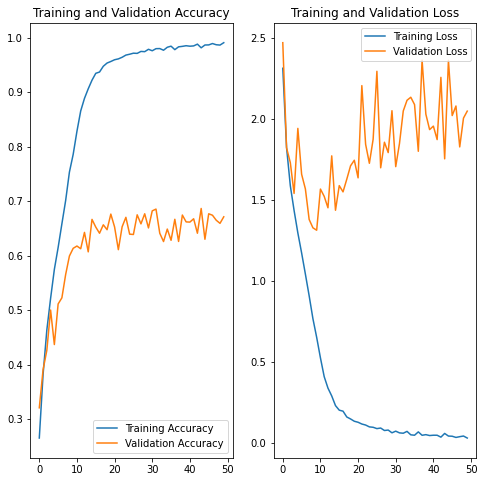

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

class_names = train_ds.class_names
img = tf.keras.utils.load_img('canine.jpg', target_size=(227, 227))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cane with a 12.93 percent confidence.


In [ ]:
class_names = train_ds.class_names
img = tf.keras.utils.load_img('test1.jpg', target_size=(227, 227))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to elefante with a 14.52 percent confidence.


In [ ]:
img = tf.keras.utils.load_img('gallo.jpg', target_size=(227, 227))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cane with a 10.12 percent confidence.
